In [23]:
from sympy import *

In [1]:
from sympy.core import S, I, pi, oo
from sympy.core.symbol import Symbol, symbols
from sympy.core.numbers import Integer, Rational
from sympy.integrals import integrate
from sympy.functions import (exp, sqrt, factorial, hyper, Ynm, cos, sin)
from sympy import init_printing

In [24]:
init_printing()

In [25]:
z, r, q, s = symbols('z r q s', positive = True)
theta, phi = symbols('theta phi', real = True)
n = symbols('n', integer = True, postive = True)
l, m = symbols('l m', integer = True)
a_bohr = 0.52917721067

In [26]:
def h_l_rnl(z,n,l,r):
    z1, r1 = symbols('z1 r1', real = True)
    n1, l1 = symbols('n1 l1', integer = True)
    x = Integer(2) * z1 * r1 / n1
    norm = (
            1 / factorial(Integer(2) * l1 + Integer(1))
            * (2*z1/n1)**(Rational(3,2))
            * sqrt(factorial(n1+l)/factorial(n1-l1-Integer(1))/(Integer(2)*n1))
            )
    f = norm * x**l1 * exp(-x/2) * hyper((-n1+l1+1,),[2*l1+2],x)
    return f.subs([(z1,z),(n1,n),(l1,l),(r1,r)])

In [27]:
def rho_h_l_p(z,n,l,m,r,theta,phi):
    theta1,phi1 = symbols('theta1 phi1', real = True)
    m1 = symbols('m1', integer = True)
    res = (
        (abs(Ynm(l,m1,theta1,phi1))**2).subs(
            [(m1,m),(theta1,theta),(phi1,phi)]).expand(func=True)
        * abs(h_l_rnl(z,n,l,r))**2
    ) 
    return res

In [28]:
def rho_h_l(z,g,r,theta,phi):
    s1 = Integer(0)
    for g_i in g:
        n=g_i[0]; l=g_i[1]; m=g_i[2]
        s1 += rho_h_l_p(z,n,l,m,r,theta,phi)
    return s1.simplify()

In [29]:
def rho_h_l_fourier(z,g,q):
    return integrate(
                    r*r * rho_h_l(z,g,r,theta,phi)
                    * exp(I*q*r*cos(theta)) * sin(theta),
                    (phi,0,2*pi),(theta,0,pi),(r,0,oo)
            ).simplify().factor()

In [30]:
def asf_h_l(z,g,s):
    return rho_h_l_fourier(z,g,q).subs(q,Integer(4)*pi*a_bohr*s)

In [31]:
gg=[[1,0,0,1],[1,0,0,-1],[2,0,0,1],[2,0,0,-1],[2,1,-1,1]]

In [32]:
h_l_rnl(z,1,0,r).simplify()

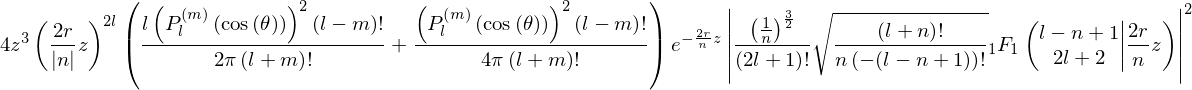

In [33]:
rho_h_l_p(z,n,l,m,r,theta,phi)

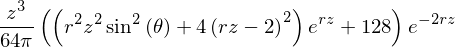

In [34]:
rho_h_l(z,gg,r,theta,phi)

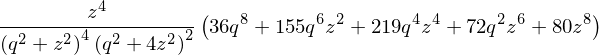

In [35]:
rho_h_l_fourier(z,gg,q)

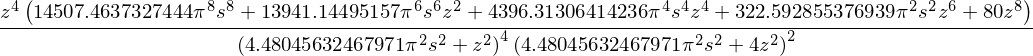

In [36]:
asf_h_l(z,gg,s)

In [56]:
rho_h_l_num = lambdify((r,theta,phi), rho_h_l(1,gg,r,theta,phi), "math")

In [60]:
rho_h_l_num(1.,0.5,3.)

In [61]:
rho_h_l_num(1.,0.,3.)

In [19]:
aa = Symbol('aa', real=True)

In [20]:
type(aa)

sympy.core.symbol.Symbol

In [21]:
aa.assumptions0

{'commutative': True,
 'complex': True,
 'hermitian': True,
 'imaginary': False,
 'real': True}

In [37]:
ccode(rho_h_l(z,gg,r,theta,phi))

'(1.0L/64.0L)*pow(z, 3)*((pow(r, 2)*pow(z, 2)*pow(sin(theta), 2) + 4*pow(r*z - 2, 2))*exp(r*z) + 128)*exp(-2*r*z)/M_PI'

In [39]:
print(latex(rho_h_l(z,gg,r,theta,phi)))

\frac{z^{3}}{64 \pi} \left(\left(r^{2} z^{2} \sin^{2}{\left (\theta \right )} + 4 \left(r z - 2\right)^{2}\right) e^{r z} + 128\right) e^{- 2 r z}
